## projet interne

## Table of Contents :


1. Introduction
2. Getting the system ready and loading the dataset
3. Exploring the data
4. Exploratory Data Analysis (EDA)
 *  Univariate Analysis
 
  * Bivariate Analysis
5. Missing value and outlier treatment

### Introduction

Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties.

we’ll build a predictive model to predict if an applicant is able to repay the lending company or not


###  Libraries 📕📗📘

In [2]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS



### File Paths 📂

In [3]:
#list all files under the input directory
for dirname, _, filenames in os.walk('C:/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Dataset\Dataset.csv
C:/Dataset\test_data.csv
C:/Dataset\train_data.csv


In [4]:
#path for the training set
tr_path = "C:/Dataset/train_data.csv"
#path for the testing set
te_path = "C:/Dataset/test_data.csv"

### Exploring the  Dataset

This dataset is named [Loan_Dataset]. The dataset contains a set of **614** records under **13** attributes:

In [5]:
Loan_Dataset=pd.read_csv(r'C:/Dataset/Dataset.csv')
Loan_Dataset.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_df=pd.read_csv(tr_path)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test_df=pd.read_csv(te_path)
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
print(pd.DataFrame(train_df.columns))

                    0
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6     ApplicantIncome
7   CoapplicantIncome
8          LoanAmount
9    Loan_Amount_Term
10     Credit_History
11      Property_Area
12        Loan_Status


We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.

In [9]:
print(pd.DataFrame(test_df.columns))

                    0
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6     ApplicantIncome
7   CoapplicantIncome
8          LoanAmount
9    Loan_Amount_Term
10     Credit_History
11      Property_Area


We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

###  Size of each data set:

In [10]:
print(f"training set (row, col): {train_df.shape}\n\ntesting set (row, col): {test_df.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


### Preprocessing of the training dataset

In [11]:
#column information
Loan_Dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
Loan_Dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_544\3048537679.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  Loan_Dataset.info(verbose=True, null_counts=True)


In [13]:
# summary statistic for dataset
train_df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Exploratory Data Analysis (EDA)

### univariate Analysis

<AxesSubplot:>

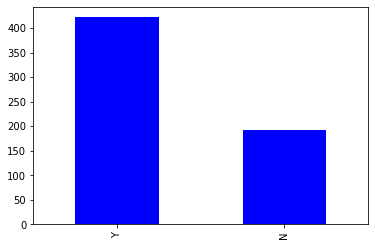

In [86]:
train_df['Loan_Status'].value_counts().plot.bar(color='blue')

In [88]:
train_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [89]:
train_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

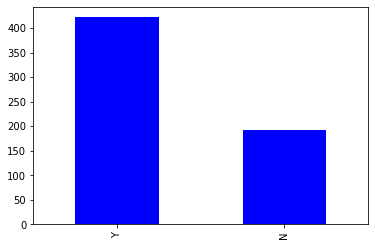

In [92]:
train_df['Loan_Status'].value_counts().plot.bar(color='blue')

The loan of 422(around 69%) people out of 614 were approved.

Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

### Categorical variables

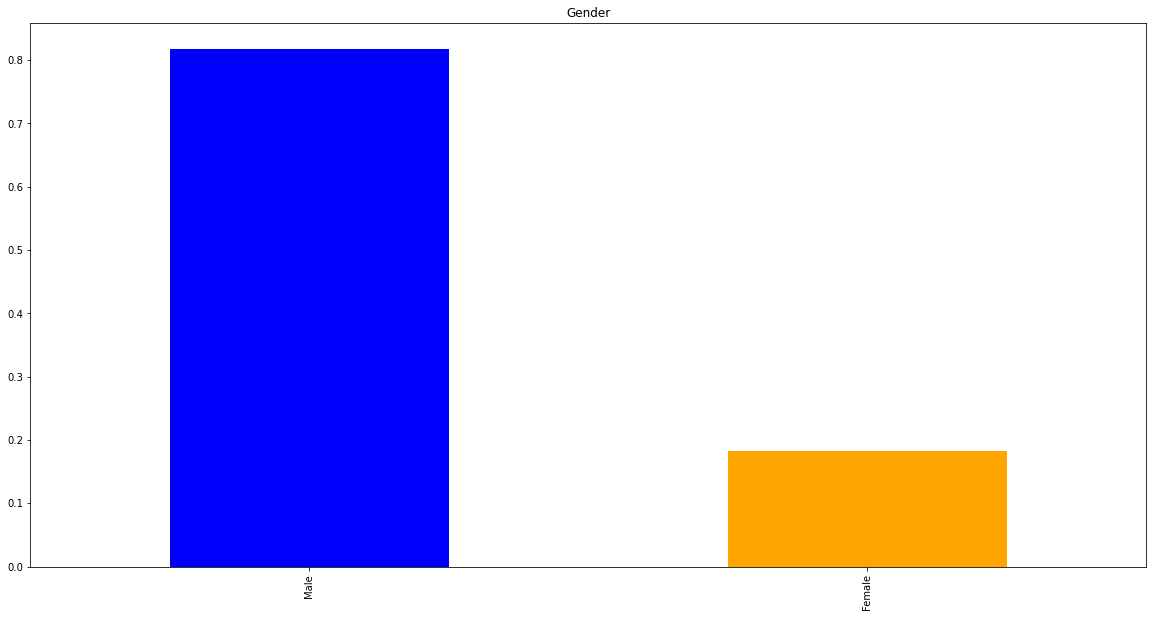

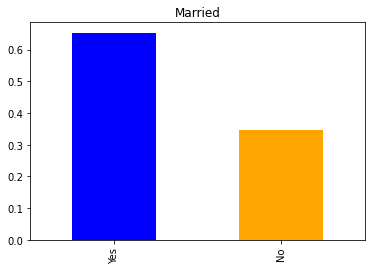

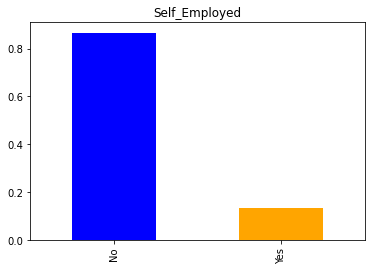

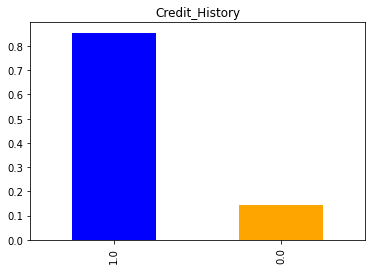

In [96]:
colors = ['blue', 'orange']
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender',color=colors)
plt.show()
train_df['Married'].value_counts(normalize=True).plot.bar(title='Married',color=colors)
plt.show()
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color=colors)
plt.show()
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color=colors)
plt.show()

It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their doubts.

### Ordinal variables

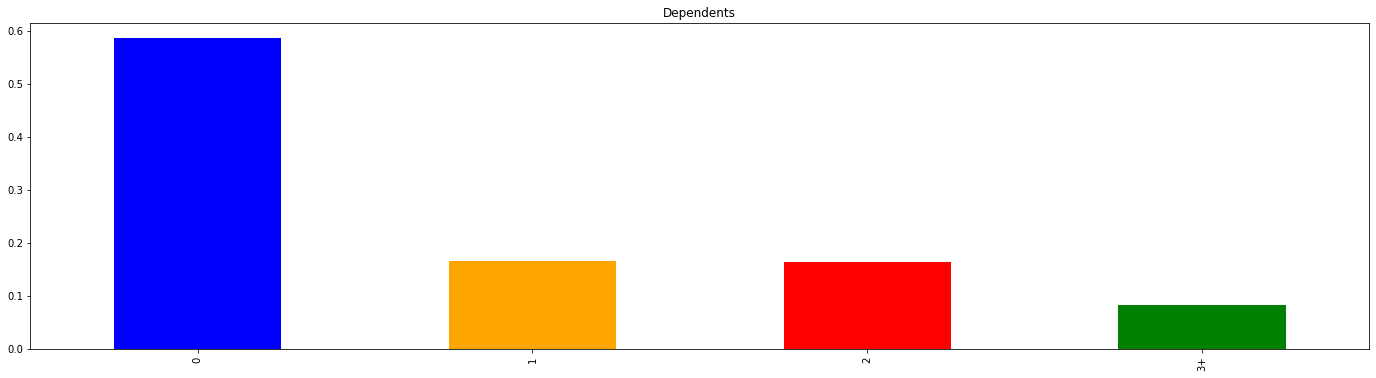

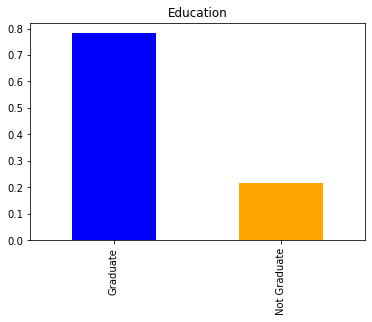

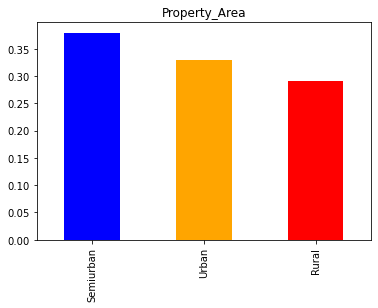

In [101]:
colors=['blue', 'orange','red','green']
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents', color=colors)
plt.show()
train_df['Education'].value_counts(normalize=True).plot.bar(title='Education', color=colors)
plt.show()
train_df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area', color=colors)
plt.show()

Following inferences can be made from the above bar plots:

* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

### Numerical variables 

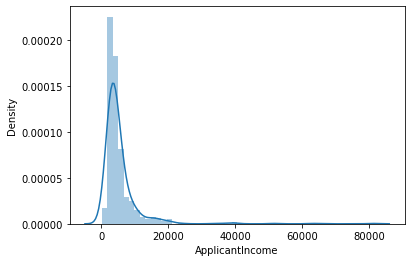

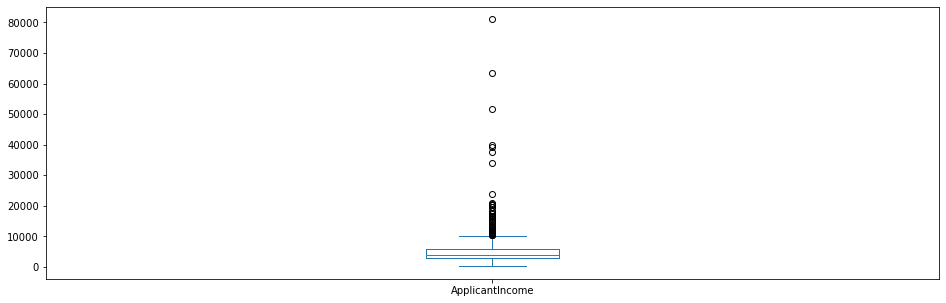

In [103]:
sns.distplot(train_df['ApplicantIncome'])
plt.show()
train_df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different eduation levels. Let us segregate them by **Education**.

Text(0.5, 0.98, '')

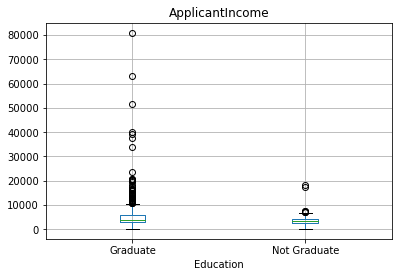

In [104]:
train_df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

Let's look at the Coapplicant income distribution

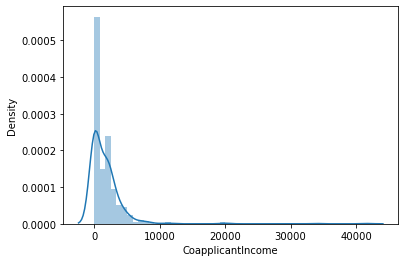

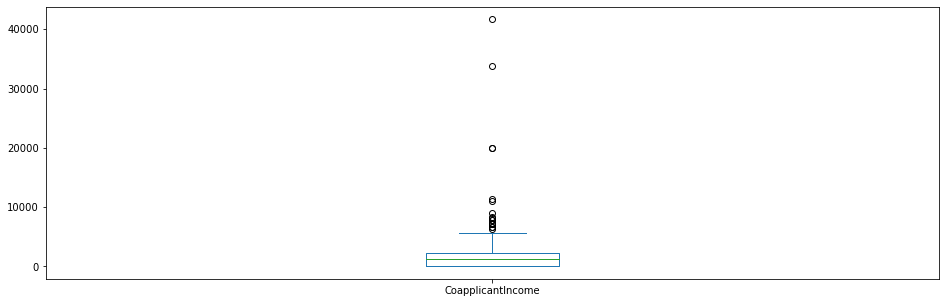

In [107]:
sns.distplot(train_df['CoapplicantIncome'])
plt.show()
train_df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

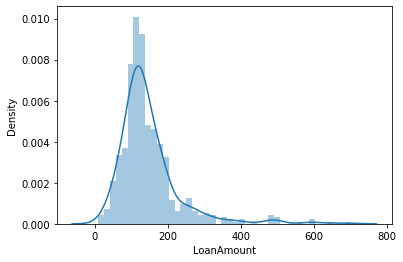

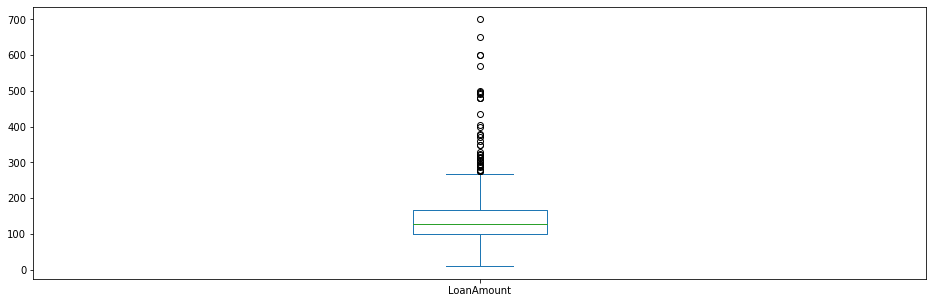

In [108]:
sns.distplot(train_df['LoanAmount'])
plt.show()
train_df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

### Bivariate Analysis

Let's recall some of the hypotheses that we generated earlier:

* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Let's try to test the above-mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable and Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

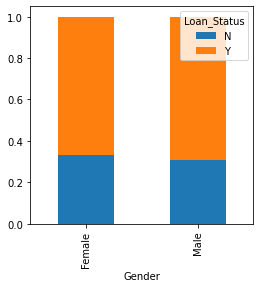

In [109]:
Gender=pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

### Missing values 🚫

In [62]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There are many ways data can end up with missing values. For example:

* in the 'Gender' column, there might be 13 missing values, which could be due to some applicants not providing their gender information or errors in recording the data during the application process.

* the 'Self_Employed' column has 32 missing values, which could mean that those applicants did not indicate whether they were self-employed or not. 

*  the 'Dependents' column has 15 missing values, which could be due to some applicants not having any dependents or not providing the number of dependents they have.


Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.

In [64]:
#missing values in decsending order
print("Train:\n")
print(train_df.isnull().sum().sort_values(ascending=False),"\n\n",train_df.isnull().sum()/train_df.shape[0] *100,"\n\n")
print("Test:\n")
print(test_df.isnull().sum().sort_values(ascending=False),"\n\n",test_df.isnull().sum()/test_df.shape[0] *100,"\n\n")

Train:

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64 

 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64 


Test:

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
Coapplica

We can see the % of each missing Values per columns is different!

### Let's check the value counts for Train dataset :

In [69]:
print("Credit_History:\n", train_df.Credit_History.value_counts(), "\n\n")
print("Self_Employed:\n", train_df.Self_Employed.value_counts(), "\n\n")
print("LoanAmount:\n", train_df.LoanAmount.value_counts(), "\n\n")
print("Dependents:\n", train_df.Dependents.value_counts(), "\n\n")
print("Loan_Amount_Term:\n", train_df.Loan_Amount_Term.value_counts(), "\n\n")
print("Gender:\n", train_df.Gender.value_counts(), "\n\n")
print("Married:\n", train_df.Married.value_counts(), "\n\n")



Credit_History:
 1.0    475
0.0     89
Name: Credit_History, dtype: int64 


Self_Employed:
 No     500
Yes     82
Name: Self_Employed, dtype: int64 


LoanAmount:
 120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64 


Dependents:
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 


Loan_Amount_Term:
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 


Gender:
 Male      489
Female    112
Name: Gender, dtype: int64 


Married:
 Yes    398
No     213
Name: Married, dtype: int64 




------------------------------------------------------------------------------------------------------------------------------
Credit_History,Self_Employed,Dependents,Gender,Married are categorical columns, therefore we will impute missing values with Medium the **mode** value

In [77]:
print('train_df : mode : ',train_df['Credit_History'].mode().values[0])
print('train_df : mode : ',train_df['Self_Employed'].mode().values[0])
print('train_df : mode : ',train_df['Dependents'].mode().values[0])
print('train_df : mode : ',train_df['Gender'].mode().values[0])
print('train_df : mode : ',train_df['Married'].mode().values[0])


train_df : mode :  1.0
train_df : mode :  No
train_df : mode :  0
train_df : mode :  Male
train_df : mode :  Yes


In [81]:
# filling the missing values

train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].dropna().mode().values[0])
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].dropna().mode().values[0])
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].dropna().mode().values[0])
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].dropna().mode().values[0])
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].dropna().mode().values[0])

#checking if we filled missing values
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Text(0.5, 1.0, 'LoanAmount Boxplot')

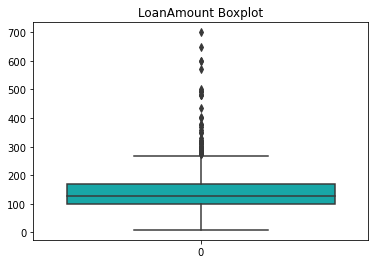

In [82]:
sns.boxplot(data=train_df['LoanAmount'],orient="v", color = 'c')
plt.title("LoanAmount Boxplot")

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.